In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from cycler import cycler

In [2]:
def square_grid(xmin, xmax, ymin, ymax, n):
    dx = (xmax - xmin) / n
    dy = (ymax - ymin) / n
    n *= 1j
    yy, xx = np.mgrid[xmin:xmax:n, ymin:ymax:n]
    return xx, yy, dx, dy

def imshow(arr, imshow_kwargs, subplots_kwargs, contour=None):
    
    fig, ax = plt.subplots(**subplots_kwargs)
    cax = ax.imshow(arr[::-1, :], **imshow_kwargs)

    # Draw Cartesian axes with arrows
    # see [1]
    ax.spines[["left", "bottom"]].set_position(("data", 0))
    ax.spines[["top", "right"]].set_visible(False)
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

    if contour is not None:
        contour = np.array(contour)
        if len(contour.shape) == 2:
            ax.contour(xx, yy, contour, levels=[0], colors=['k'], linewidths=[2])
        else:
            linestyles = ["solid", "dashed", "dotted", "dashdot"]
            for i, function in enumerate(contour):
                i = i % len(linestyles)
                ax.contour(xx, yy, function, levels=[0], colors=['k'], linewidths=[2], linestyles=[linestyles[i]])
    
    plt.show()
cmap = ListedColormap(["#1A3797", "white", "#DA2A2A"])
color_options = dict(cmap=cmap, vmin=-1, vmax=1)

# [1]: https://matplotlib.org/stable/gallery/spines/centered_spines_with_arrows.html#sphx-glr-gallery-spines-centered-spines-with-arrows-py

# Question 57
$$
\int_0^{3\frac{\sqrt{2}}{2}} \int_{x}^{\sqrt{9-x^2}} \,dy dx
$$

C:\Users\Ray\AppData\Local\Temp\ipykernel_35360\4132173884.py:8: RuntimeWarning: invalid value encountered in sqrt
  g_2 = (9 - xx * xx)**0.5


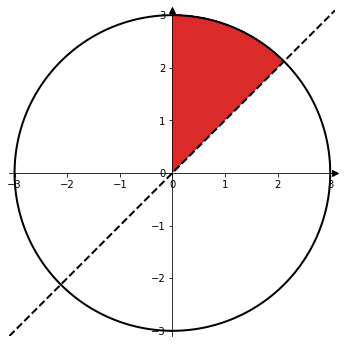

numerical answer = 3.5273793300000027
analytic answer = 3.5342917352885173


In [3]:
max_val = 3.1
xmin, xmax = [-max_val, max_val]
ymin, ymax = [-max_val, max_val]
xx, yy, dx, dy = square_grid(xmin, xmax, ymin, ymax, 2_000)

f = np.ones_like(xx)
g_1 = xx
g_2 = (9 - xx * xx)**0.5

x_bounds = np.logical_and(xx > 0, xx < 3/2**0.5)
y_bounds = np.logical_and(yy > g_1, yy < g_2)
area = np.logical_and(x_bounds, y_bounds)

shaded_area_img = np.zeros_like(xx, dtype=int)
shaded_area_img[area] += 1


imshow(
    shaded_area_img,
    imshow_kwargs=dict(extent=[xmin, xmax, ymin, ymax], **color_options),
    subplots_kwargs=dict(figsize=(6,6)),
    contour = [xx*xx + yy*yy - 9, yy - xx]
)

integral = np.sum(f[area] * dx*dy)
print("numerical answer =", integral)
print("analytic answer =", 9*np.pi/8)

# Question 58
$$
\int_0^1 \int_{\frac{\sqrt{3}}{3}y}^{\sqrt{4-y^2}} \sqrt{x^2 + y^2} dx dy
$$

C:\Users\Ray\AppData\Local\Temp\ipykernel_35360\2466785710.py:8: RuntimeWarning: invalid value encountered in sqrt
  g_2 = (4 - yy*yy)**0.5


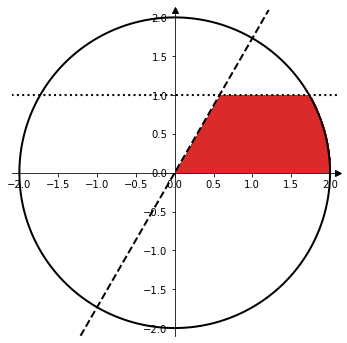

numerical answer = 1.988642229054411
analytic answer = 1.990444518439105


In [4]:
max_val = 2.1
xmin, xmax = [-max_val, max_val]
ymin, ymax = [-max_val, max_val]
xx, yy, dx, dy = square_grid(xmin, xmax, ymin, ymax, 2_000)

f = (xx**2 + yy**2)**0.5
g_1 = yy / np.sqrt(3)
g_2 = (4 - yy*yy)**0.5

x_bounds = np.logical_and(xx > g_1, xx < g_2)
y_bounds = np.logical_and(yy > 0, yy < 1)
area = np.logical_and(x_bounds, y_bounds)

shaded_area_img = np.zeros_like(xx, dtype=int)
shaded_area_img[area] += 1

# x = xx[0, :]
# for i, y in enumerate(yy[:, 0]):
#     if (y >= 0) and (y <= 1):
#         y1 = y / (3**0.5)
#         y2 = (4 - y*y)**0.5
#         shade_dy = np.logical_and(x >= y1, x <= y2)
#         img[i, :][shade_dy] += 2


ax = imshow(
    shaded_area_img,
    imshow_kwargs=dict(extent=[xmin, xmax, ymin, ymax], **color_options),
    subplots_kwargs=dict(figsize=(6,6)),
    contour=[xx*xx + yy*yy - 4, yy / np.sqrt(3) - xx, yy - 1]
)

integral = np.sum(f[area] * dx*dy)
print("numerical answer =", integral)
print("analytic answer =", 4/9*np.pi + 1/3*(3**0.5 - 1/3 + 0.5*np.log(1 + 2*3**0.5/3)))

# Question 29

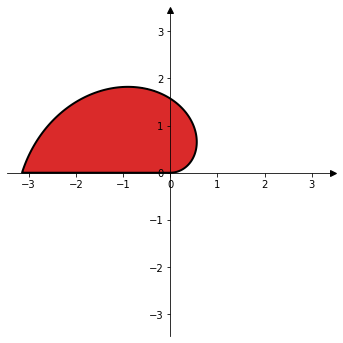

numerical answer = 5.1677814366175125
analytic answer = 5.167712780049969


In [5]:
max_val = 1.1*np.pi
xmin, xmax = [-max_val, max_val]
ymin, ymax = [-max_val, max_val]
xx, yy, dx, dy = square_grid(xmin, xmax, ymin, ymax, 5001)

r = (xx**2 + yy**2)**0.5
theta = np.arctan2(yy, xx)

f = np.ones_like(xx)
r_of_theta = theta

area = r < r_of_theta
mask = np.zeros_like(r)
mask[area] += 1

imshow(
    mask,
    imshow_kwargs=dict(extent=[xmin, xmax, ymin, ymax], **color_options),
    subplots_kwargs=dict(figsize=(6,6)),
    contour = r - theta
)

integral = np.sum(f[area] * dx * dy)
print("numerical answer =", integral)
print("analytic answer =", np.pi**3/6)

# Question 30

$$
r^2 = \sin (2\theta)
$$

C:\Users\Ray\AppData\Local\Temp\ipykernel_35360\1062466890.py:10: RuntimeWarning: invalid value encountered in sqrt
  r_of_theta = np.sin(2*theta)**0.5


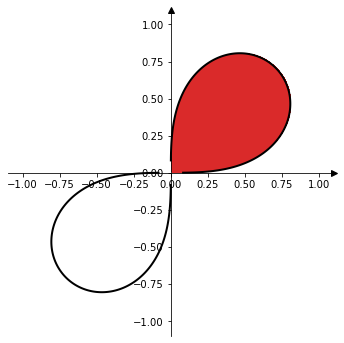

numerical answer = 0.4997998895999974
analytic answer = 0.5


In [6]:
max_val = 1.1
xmin, xmax = [-max_val, max_val]
ymin, ymax = [-max_val, max_val]
xx, yy, dx, dy = square_grid(xmin, xmax, ymin, ymax, 5000)

r = (xx**2 + yy**2)**0.5
theta = np.arctan2(yy, xx)

f = np.ones_like(xx)
r_of_theta = np.sin(2*theta)**0.5

first_loop_quadrant = np.logical_and(theta > 0., theta < np.pi/2)
both_loops = np.logical_and(r < r_of_theta, r_of_theta > 0.)
first_loop = np.logical_and(first_loop_quadrant, both_loops)
area = first_loop
mask = np.zeros_like(r)
mask[area] += 1

imshow(
    mask,
    imshow_kwargs=dict(extent=[xmin, xmax, ymin, ymax], **color_options),
    subplots_kwargs=dict(figsize=(6,6)),
    contour = r - r_of_theta
)

integral = np.sum(f[area] * dx * dy)
print("numerical answer =", integral)
print("analytic answer =", 0.5)

# Question 31
$$
r = 1 + \sqrt{2} \cos \theta
$$

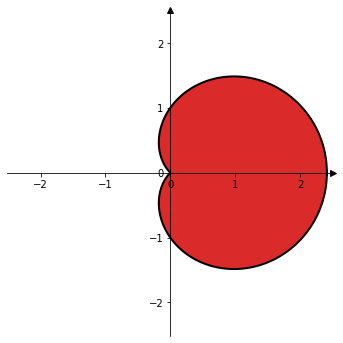

numerical answer = 6.207531481890488
analytic answer = 6.21238898038469


In [7]:
max_val = 1 + 2**0.5 + 0.1
xmin, xmax = [-max_val, max_val]
ymin, ymax = [-max_val, max_val]
xx, yy, dx, dy = square_grid(xmin, xmax, ymin, ymax, 2500)

r = (xx**2 + yy**2)**0.5
theta = np.arctan2(yy, xx)

f = np.ones_like(xx)
r_of_theta = 1 + 2**0.5 * np.cos(theta)

area = np.logical_and(r < r_of_theta, r_of_theta > 0)
mask = np.zeros_like(r)
mask[area] += 1

imshow(
    mask,
    imshow_kwargs=dict(extent=[xmin, xmax, ymin, ymax], **color_options),
    subplots_kwargs=dict(figsize=(6,6)),
    contour = r - 1 - 2**0.5 * xx / r
)

integral = mask.ravel()[mask.ravel() == 1].shape[0] * dx * dy
print("numerical answer =", integral)
print("analytic answer =", 3*(1 + np.pi)/2)

# Question 32
$$
r = \sqrt{3} - 2\sin \theta
$$

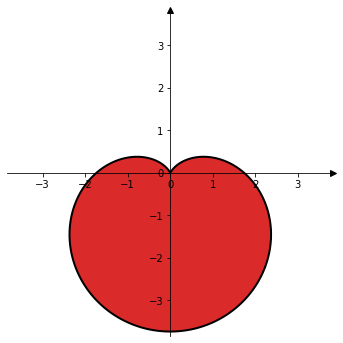

numerical answer = 15.675573395153851
analytic answer = 15.688045601310789


In [8]:
max_val = 3**0.5 + 2.1
xmin, xmax = [-max_val, max_val]
ymin, ymax = [-max_val, max_val]
xx, yy, dx, dy = square_grid(xmin, xmax, ymin, ymax, 2500)

r = (xx**2 + yy**2)**0.5
theta = np.arctan2(yy, xx)

f = np.ones_like(xx)
r_of_theta = 3**0.5 - 2 * np.sin(theta)

area = np.logical_and(r < r_of_theta, r_of_theta > 0)
mask = np.zeros_like(r)
mask[area] += 1

imshow(
    mask,
    imshow_kwargs=dict(extent=[xmin, xmax, ymin, ymax], **color_options),
    subplots_kwargs=dict(figsize=(6,6)),
    contour = r - 3**0.5 + 2 * yy / r
)

integral = np.sum(f[area] * dx * dy)
print("numerical answer =", integral)
print("analytic answer =", (9*3**0.5 + 25*np.pi)/6)

# Question 33
$$
\begin{cases}
r = 3 - 3 \sin \theta \\
r = 1 + \sin \theta
\end{cases}
$$

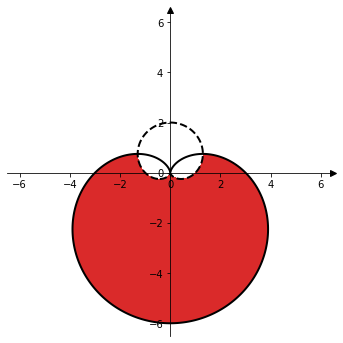

numerical answer = 40.68784511999991
analytic answer = 40.72119849683824


In [9]:
max_val = 6.5
xmin, xmax = [-max_val, max_val]
ymin, ymax = [-max_val, max_val]
xx, yy, dx, dy = square_grid(xmin, xmax, ymin, ymax, 2500)

r = (xx**2 + yy**2)**0.5
theta = np.arctan2(yy, xx)

f = np.ones_like(xx)
r_of_theta_1 = 3 - 3 * np.sin(theta)
r_of_theta_2 = 1 + np.sin(theta)

r_max = np.maximum(r_of_theta_1, r_of_theta_2)
smaller_cardioid = np.logical_and(r < r_of_theta_2, r_of_theta_2 > 0)
area = np.logical_and(r < r_max, r_max > 0)
area = np.logical_and(area, ~smaller_cardioid)
mask = np.zeros_like(r)
mask[area] += 1

imshow(
    mask,
    imshow_kwargs=dict(extent=[xmin, xmax, ymin, ymax], **color_options),
    subplots_kwargs=dict(figsize=(6,6)),
    contour = [r - r_of_theta_1, r - r_of_theta_2]
)

integral = np.sum(f[area] * dx * dy)
print("numerical answer =", integral)
print("analytic answer =", 8*np.pi + 9*3**0.5)

# Question 34
$$
\begin{cases}
r = 3 - 3 \sin \theta \\
r = 1 + \sin \theta
\end{cases}
$$

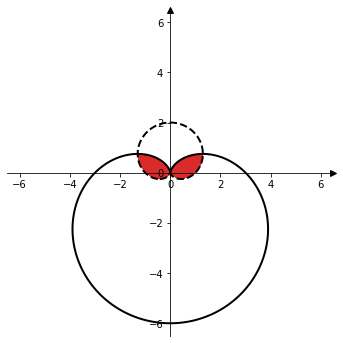

numerical answer = 1.6895673599999994
analytic answer = 1.690302326623966


In [10]:
max_val = 6.5
xmin, xmax = [-max_val, max_val]
ymin, ymax = [-max_val, max_val]
xx, yy, dx, dy = square_grid(xmin, xmax, ymin, ymax, 2500)

r = (xx**2 + yy**2)**0.5
theta = np.arctan2(yy, xx)

f = np.ones_like(xx)
r_of_theta_1 = 3 - 3 * np.sin(theta)
r_of_theta_2 = 1 + np.sin(theta)

r_min = np.minimum(r_of_theta_1, r_of_theta_2)
area = np.logical_and(r < r_min, r_min > 0)
mask = np.zeros_like(r)
mask[area] += 1

ax = imshow(
    mask,
    imshow_kwargs=dict(extent=[xmin, xmax, ymin, ymax], **color_options),
    subplots_kwargs=dict(figsize=(6,6)),
    contour = [r - r_of_theta_1, r - r_of_theta_2]
)

integral = np.sum(f[area] * dx * dy)
print("numerical answer =", integral)
print("analytic answer =", -9*3**0.5 + 11*np.pi/2)